# 3-3. 신경망(torch.nn) Model (MNIST)


Reference: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html


출처 : https://wikidocs.net/156984

신경망은 데이터에 대한 연산을 수행하는 계층(layer)/모듈(module)로 구성되어 있습니다. 신경망은 torch.nn 패키지를 사용하여 생성할 수 있습니다. torch.nn.Module 신경망은 데이터에 대한 연산을 수행하는 계층(layer)/모듈(module)로 구성되어 있습니다.

torch.nn.Module은 모든 뉴럴 네트워크 모듈의 기본 클래스입니다. 일반적인 모델들은 이 클래스를 상속받아야 합니다. 모듈들은 다른 모듈을 또 포함할 수 있습니다. 이러한 중첩된 구조는 복잡한 아키텍처를 쉽게 구축하고 관리할 수 있습니다.

torch.nn.Module 은 PyTorch의 모든 Neural Network의 Base Class입니다. 모듈은 다른 모듈을 포함할 수 있고, 트리 구조로 형성할 수 있습니다. nn 패키지는 신경망 계층(layer)과 거의 비슷한 Module 의 집합을 정의합니다. Module은 입력 텐서를 받고 출력 텐서를 계산하는 한편, 학습 가능한 매개변수를 갖는 텐서들을 내부 상태(internal state)로 갖습니다. nn 패키지는 또한 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수(loss function)들도 정의하고 있습니다.

공식문서에 예제를 코딩해보면서 감을 잡아보겠습니다.



In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))


MyModel을 만들 때, nn.Module을 상속받아서 기본적인 기능들을 사용할 수 있게 만들어줍니다. init() 메소드에는 신경망 레이어의 구성요소들을 정의하고, forward에서는 호출 될 때 수행되는 연산을 정의합니다. 이 두가지 메소드는 torch.nn.Module을 상속받는 모든 클래스에서 반드시 정의해야 하고 override되어야 합니다. nn.Module에서 상속받아 하위 클라스로 처리하는 것은 forward 계산까지 깔끔하게 한 묶음 처리가 가능해지므로 학습 루틴 코딩이 간단해지는 장점이 있을 수 있습니다.



## Fashion MNIST 신경망으로 학습하기
<hr>
Fashion MNIST 신경망을 만들 때 사용되는 Layer 들에 대해 몇가지만 알아보겠습니다.

nn.Flatten nn.Flatten 계층을 초기화하여 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다. (dim=0의 미니배치 차원은 유지됩니다.)



In [20]:
flatten = nn.Flatten()
input_image = torch.randn(1, 1, 28, 28)
flat_image = flatten(input_image)
print(flat_image.size())


torch.Size([1, 784])


nn.Linear 선형 계층 은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다.



In [21]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([1, 20])


nn.ReLU 비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다. 이 모델에서는 nn.ReLU 를 선형 계층들 사이에 사용하지만, 모델을 만들 때는 비선형성을 가진 다른 활성화를 도입할 수도 있습니다.



In [22]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.3075,  0.0346, -0.4421,  0.0975,  0.2317,  1.0226,  1.1650,  0.5109,
          0.7501, -0.5042,  0.6449, -0.0451, -0.2513, -0.2918, -0.4709,  0.2267,
         -0.1212,  0.4529,  0.4392,  0.1606]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.3075, 0.0346, 0.0000, 0.0975, 0.2317, 1.0226, 1.1650, 0.5109, 0.7501,
         0.0000, 0.6449, 0.0000, 0.0000, 0.0000, 0.0000, 0.2267, 0.0000, 0.4529,
         0.4392, 0.1606]], grad_fn=<ReluBackward0>)


nn.Sequential nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.



In [23]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)


nn.Softmax 신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될 ([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환합니다. logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)됩니다. dim 매개변수는 값의 합이 1이 되는 차원을 나타냅니다. softmax = nn.Softmax(dim=1) pred_probab = softmax(logits)

신경망의 일반적인 학습과정은 다음과 같다.

1. 학습 가능한 매개 변수(또는 가중치(weight)를 갖는 신경망을 정의한다.
2. 데이터셋(dataset)입력을 반복한다.
3. 입력을 신경망에서 전파(process)한다.
4. 손실(loss: 출력이 정답으로부터 얼마나 떨어져 있는지)을 계산한다.
5. 변화도(gradient)를 신경망의 매개변수들에 역으로 전파한다. (Backpropagation)
6. 신경망의 가중치를 갱신한다. 일반적으로 다음과 같은 간단한 규칙을 사용한다. 업데이트된 가중치(weight) = 가중치(weight) - 학습률(learning rate) * 변화도(gradient)

위의 순서대로 FashionMNIST 데이터셋의 이미지들을 분류하는 신경망을 구성해보겠습니다.

먼저 필요한 모듈들을 import 합니다.



In [24]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'


학습 가능한 매개 변수(또는 가중치(weight)를 갖는 신경망을 정의합니다. . Deep Learning 기본 개념인 여러 개의 Layer를 갖도록 구성합니다. Linear 선형 계층 은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈입니다. 선형 계층들 사이에 ReLU는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 비선형 activation function는 선형 변환 후에 적용되어 비선형성(nonlinearity)을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다. batch normalization은 학습 과정에서 각 배치 단위 별로 데이터가 다양한 분포를 가지더라도 각 배치별로 평균과 분산을 이용해 정규화하는 것을 뜻합니다. batch normalization은 activation function 앞에 적용됩니다. Pytorch에서 Batch Normalization을 사용하는 대표적인 방법은 torch.nn.BatchNorm1d와 torch.nn.BatchNorm2d를 사용하는 것입니다.



In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            torch.nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            torch.nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),
            torch.nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


init 에서 신경망 계층들을 초기화합니다. nn.Module 을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현합니다. 정의된 신경망은 다음과 같이 동작 합니다.

* FashionMNIST 데이터는 28x28 크기의 흑백 이미지 데이터 입니다. 이 입력에 대해 Flatten 계층에서 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환합니다.
* linear_relu_stack 은 Sequential 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. Linear 와 ReLU 계층을 거치면서 학습이 됩니다.
* 최종적으로 10개의 확률적 출력을 만들어 냅니다.

Dataset 과 DataLoader를 만듭니다.



In [26]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

100%|██████████| 26421880/26421880 [00:02<00:00, 12476836.68it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 215482.82it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3991539.04it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4811113.41it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset 과 DataLoader에 대해서는 다음 챕터에서 더 자세하게 설명 하겠습니다. 여기서는 이미 만들어져 제공되는 FashionMNIST 데이타셋을 그대로 사용했습니다.

torchvision 의 datasets에서 FashionMNIST 데이터를 가져와서 torchvision 의 transforms.ToTensor() 로 텐서로 변환 합니다. transform 으로 ToTensor() 함수를 사용하는 것은 PIL 이미지 또는 numpy.ndarray를 pytorch의 텐서로 변형시켜 줍니다. 그다음 batch_size=64 인 DataLoader 를 만들어 줍니다.

NeuralNetwork 의 인스턴스(instance)를 생성하고 이를 device 로 이동한 뒤, 구조(structure)를 출력합니다.



In [28]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)


학습에 필요한 하이퍼 파라메터를 지정합니다.

하이퍼파라메터(Hyperparameter)는 모델 최적화 과정을 제어할 수 있는 조절 가능한 매개변수입니다. 서로 다른 하이퍼파라메터 값은 모델 학습과 수렴율(convergence rate)에 영향을 미칠 수 있습니다.

학습 시에는 다음과 같은 하이퍼파라메터를 정의합니다:

에폭(epoch) 수 - 데이터셋을 반복하는 횟수 배치 크기(batch size) - 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수 학습률(learning rate) - 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 학습 중 예측할 수 없는 동작이 발생할 수 있습니다.



In [29]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

손실함수와 옵티마이저를 정의 합니다. 손실 함수(loss function)는 획득한 결과와 실제 값 사이의 틀린 정도(degree of dissimilarity)를 측정하며, 학습 중에 이 값을 최소화하려고 합니다. 주어진 데이터 샘플을 입력으로 계산한 예측과 정답(label)을 비교하여 손실(loss)을 계산합니다.

일반적인 손실함수에는 회귀 문제(regression task)에 사용하는 nn.MSELoss(평균 제곱 오차(MSE; Mean Square Error))나 분류(classification)에 사용하는 nn.NLLLoss (음의 로그 우도(Negative Log Likelihood)), 그리고 nn.LogSoftmax와 nn.NLLLoss를 합친 nn.CrossEntropyLoss 등이 있습니다.

옵티마이저 최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정입니다. 최적화 알고리즘은 이 과정이 수행되는 방식을 정의합니다. 여기에서는 확률적 경사하강법(SGD; Stochastic Gradient Descent)를 사용했습니다.

PyTorch에는 ADAM이나 RMSProp과 같은 다른 종류의 모델과 데이터에서 더 잘 동작하는 다양한 옵티마이저가 있습니다. 옵티마이저를 SGD 보다 Adam 을 사용하면 더 높은 정확도를 기대할 수 있습니다. 학습하려는 모델의 매개변수와 학습률(learning rate) 하이퍼파라매터를 등록하여 옵티마이저를 초기화합니다.

신경망 파라메터를 optimizer에 전달해 줄 때, torch.nn.Module 클래스의 parameters() 메소드를 사용합니다. torch.nn.Parameter 클래스는 torch.Tensor 클래스를 상속받아 만들어졌고, torch.nn.Module 클래스의 attribute로 할당하면, 자동으로 파라메터 리스트에 추가됩니다. parameters() 메소드는 모든 하위 모듈들을 탐색하고, 각 모듈의 _parameters에 들어있는 파라메터들을 하나씩 반환해주는 함수입니다.



In [31]:
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

학습 loop 를 정의 합니다. 학습 단계(loop)에서 최적화는 세단계로 이뤄집니다:

1. optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정합니다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.

2. loss.backward()를 호출하여 예측 손실(prediction loss)을 역전파합니다. PyTorch는 각 매개변수에 대한 손실의 변화도를 저장합니다.

3. 변화도를 계산한 뒤에는 optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정합니다.



In [32]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


epoch 수만큼 train loop 를 수행하여 반복 학습 합니다.


In [33]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.412915  [    0/60000]
loss: 0.544108  [ 6400/60000]
loss: 0.419642  [12800/60000]
loss: 0.492270  [19200/60000]
loss: 0.423864  [25600/60000]
loss: 0.400432  [32000/60000]
loss: 0.327355  [38400/60000]
loss: 0.505755  [44800/60000]
loss: 0.428483  [51200/60000]
loss: 0.458097  [57600/60000]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.410255 

Epoch 2
-------------------------------
loss: 0.352953  [    0/60000]
loss: 0.358234  [ 6400/60000]
loss: 0.264384  [12800/60000]
loss: 0.290027  [19200/60000]
loss: 0.344394  [25600/60000]
loss: 0.329232  [32000/60000]
loss: 0.265509  [38400/60000]
loss: 0.385761  [44800/60000]
loss: 0.341788  [51200/60000]
loss: 0.348862  [57600/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.387846 

Epoch 3
-------------------------------
loss: 0.268478  [    0/60000]
loss: 0.287581  [ 6400/60000]
loss: 0.248354  [12800/60000]
loss: 0.240610  [19200/60000]
loss: 0.313462  [25600/60000]
loss: 0.284917  [32000/600

학습이 끝났으면 학습된 모델이 얼마나 정확하게 예측 하는지 테스트 해보겠습니다. 테스트 데이터를 화면에 보여주기 위해 matplotlib.pyplot 를 import 합니다. 6x6=36 개의 이미지를 테스트 해봅니다. unsqueeze() 함수를 사용한 것은 원본 데이터의 Shape가 (1, 28, 28)인데, 이를 모델에 입력되는 데이터의 Shape인 (1, 1, 28, 28)로 변환해야 하기 때문입니다.



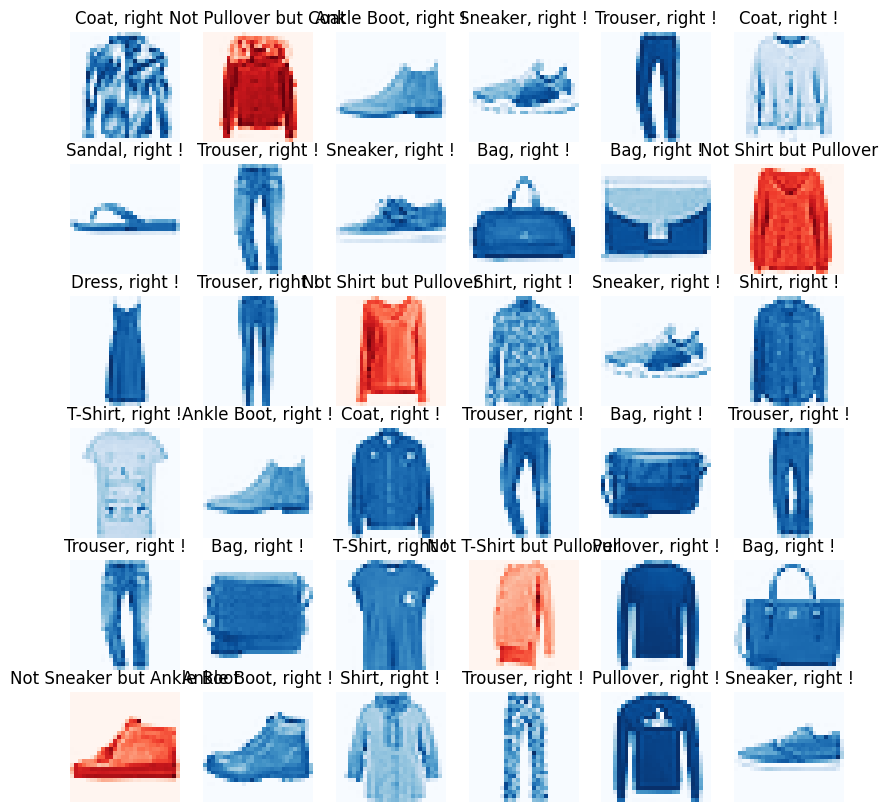

In [52]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(10,10))

# 모델을 평가 모드로 설정
model.eval()

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].unsqueeze(dim=0)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_data[data_idx][1]]

    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right !')
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' +  label)
        cmap = 'Reds'
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')

plt.show()
